# **DETECTOR DE MINERIA Y DEFORESTACIÓN**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


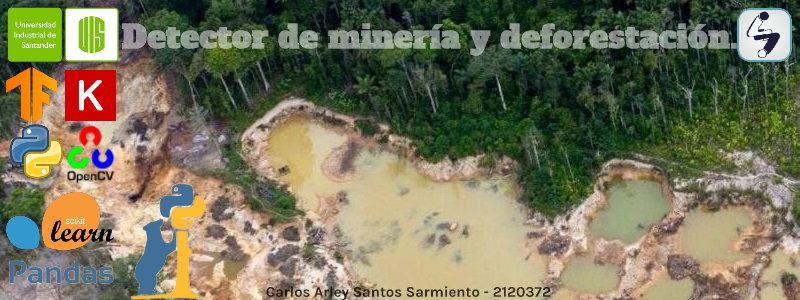

In [ ]:
from IPython.display import Image 
Image('/content/drive/My Drive/Proyecto IA/banner.png')

### **LIBRERIAS**

In [ ]:
import numpy as np 
import cv2
import os
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten, Dropout, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import *
from PIL import Image
from google.colab.patches import cv2_imshow

### **IMPORTACIÓN DEL DATASET**

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        directory = '/content/drive/My Drive/Proyecto IA/dataset',
        target_size=(100, 100),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        directory = '/content/drive/My Drive/Proyecto IA/dataset',
        target_size=(100, 100),
        batch_size=32,
        class_mode='binary')

Found 688 images belonging to 3 classes.
Found 688 images belonging to 3 classes.


### **Verificación de la importación del dataset.**

In [ ]:
base_dir =  r'/content/drive/My Drive/Proyecto IA/dataset'
folders = os.listdir(base_dir)
print(folders)

['vegetacion', 'mineria', 'deforestacion']


### **Almacenamiento y conteo de imágenes según su clasificación**

In [ ]:
vegetacion = sorted(os.listdir(base_dir +'/vegetacion'))
deforestacion =  sorted(os.listdir(base_dir +'/deforestacion'))
mineria = sorted(os.listdir(base_dir +'/mineria'))
#Cantidad de imágenes que se tienen de cada clase
print("cantidad de imágenes.")
print("Vegetación :",len(vegetacion))
print("deforestación :",len(deforestacion))
print("minería :",len(mineria))

cantidad de imágenes.
Vegetación : 131
deforestación : 349
minería : 208


### **Transformación de las imágenes a escala de grises (X) y asignación de etiquetas (y)**

In [ ]:
data = [] #X
labels = []#y
#Se realiza el proceso para la primera carpeta (vegetacion) y agregamos al label un valor de 0
for k in vegetacion:
  img = cv2.imread(base_dir +'/vegetacion/'+k) 
  gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  data.append(gris.flatten())
  labels.append(0)

#Se realiza el proceso para la segunda carpeta (deforestacion) y agregamos al label un valor de 1
for l in deforestacion:
  img = cv2.imread(base_dir +'/deforestacion/'+l) 
  gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  data.append(gris.flatten())
  labels.append(1)

#Se realiza el proceso para la tercera carpeta (mineria) y agregamos al label un valor de 2
for i in mineria:
  img = cv2.imread(base_dir +'/mineria/'+i) 
  gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  data.append(gris.flatten())
  labels.append(2)

### **Creación de los arreglos (X)(*y*)**

In [ ]:
imagenes = np.array(data)
labels = np.array(labels)

### **Normalización de los datos**

In [ ]:
imagenes = imagenes.astype(np.float32)
labels = labels.astype(np.int32)
imagenes = imagenes/255

### **Permutación de los datos**

In [ ]:
p = np.random.permutation(range(len(imagenes)))
imagenes = imagenes[p]
labels = labels[p]

### **División de los datos para entrenamiento (75%) y testeo (25%)**

In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(imagenes, labels, test_size = 0.25, random_state = 111)

### **IMPLEMENTACIÓN DE LOS MODELOS DE CLASIFICACIÓN**

### **GaussianNB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
estimador = GaussianNB()
estimador.fit(X_tr,y_tr)
predicciones = estimador.predict(X_tr)
score = cross_val_score(estimador, X_tr, y_tr, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy score: %.3f (+/- %.5f)"%(np.mean(score), np.std(score)))

accuracy score: 0.551 (+/- 0.05637)


### **DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
estimador = DecisionTreeClassifier(max_depth=20)
estimador.fit(X_tr, y_tr)
predicciones = estimador.predict(X_te)
score = cross_val_score(estimador, X_te, y_te, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy score: %.3f (+/- %.5f)"%(np.mean(score), np.std(score)))

accuracy score: 0.606 (+/- 0.13021)


### **RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
estimador = RandomForestClassifier()
estimador.fit(X_tr, y_tr)
predicciones = estimador.predict(X_te)
score = cross_val_score(estimador, X_te, y_te, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy score1 %.3f (+/- %.5f)"%(np.mean(score), np.std(score)))

accuracy score1 0.639 (+/- 0.11324)


### **SVC (kernel por defecto)**

In [ ]:
from sklearn.svm import SVC
estimador = SVC()
estimador.fit(X_tr, y_tr)
predicciones = estimador.predict(X_te)
score = cross_val_score(estimador, X_te, y_te, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy score %.3f (+/- %.5f)"%(np.mean(score), np.std(score)))

accuracy score 0.664 (+/- 0.08106)


## **CNN (Usando RGB)**

### **Tratamiento de las imágenes en RGB**

In [ ]:
data = [] #X o caracteristicas
labels = [] #y o clases
#carga las imagenes

for k in vegetacion:
  try:
    img = cv2.imread(base_dir +'/vegetacion/'+k) #libreria de openCv para leer imagenes y videos // guardamos la imagen con ese nombre porque en py es comun utilizar toda la ruta
    img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    data.append(np.array(img))
    labels.append(0)
  except AttributeError:
    print('')

for l in deforestacion:
  try:
    img = cv2.imread(base_dir +'/deforestacion/'+l) #libreria de openCv para leer imagenes y videos // guardamos la imagen con ese nombre porque en py es comun utilizar toda la ruta
    img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    data.append(np.array(img))
    labels.append(1)

  except AttributeError:
    print('')

for i in mineria:
  try:
    img = cv2.imread(base_dir +'/mineria/'+i) #libreria de openCv para leer imagenes y videos // guardamos la imagen con ese nombre porque en py es comun utilizar toda la ruta
    img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    data.append(np.array(img))
    labels.append(2)

  except AttributeError:
    print('')

### **Creación de los arreglos (X)(*y*)**

In [ ]:
imagenes = np.array(data)
labels = np.array(labels)
print('imagenes : {} | labels : {}'.format(imagenes.shape , labels.shape))

imagenes : (688, 100, 100, 3) | labels : (688,)


### **Ilustración de imagenes**

In [ ]:
def clase_terreno(imagen):
  if imagen == 0: 
    nombre = 'Vegetación'
  if imagen == 1: 
    nombre = 'Deforestación'
  if imagen == 2: 
    nombre = 'Minería'
  return nombre

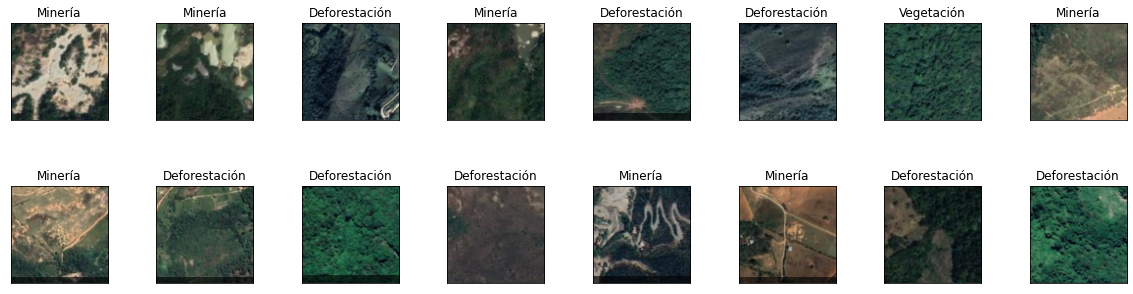

In [ ]:
plt.figure(1, figsize=(20,5))
n=0
for i in range(16):
  n += 1
  r = np.random.randint(0, imagenes.shape[0], 1)
  plt.subplot(2, 8, n) #numero de filas y cantidad de columnas de la grafica
  plt.subplots_adjust(hspace = 0.5, wspace =0.5)
  plt.imshow(imagenes[r[0]])
  plt.title('{}'.format(clase_terreno(labels[r[0]]), labels[r[0]]))
  plt.xticks([]), plt.yticks([])

plt.show()

### **Permutación de los datos**

In [ ]:
p = np.random.permutation(range(len(imagenes)))
imagenes = imagenes[p]
labels = labels[p]

### **División de los datos para entrenamiento (75%) y testeo (25%)**

In [ ]:
from sklearn.model_selection import train_test_split
#split para entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(imagenes, labels, test_size = 0.25, random_state = 111)
X_train = X_train.reshape([-1, 100, 100, 3])
X_test = X_test.reshape([-1, 100, 100, 3])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_test = tf.keras.utils.to_categorical(y_test)
y_train = tf.keras.utils.to_categorical(y_train) 
X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)
print('Numero de imagenes en x_train', X_train.shape[0], "y_train:", y_train.shape)
print('Numero de imagenes in x_test', X_test.shape[0], "y_test: ", y_test.shape)

x_train shape: (516, 100, 100, 3)
Numero de imagenes en x_train 516 y_train: (516, 3)
Numero de imagenes in x_test 172 y_test:  (172, 3)


### **Implementación del modelo de clasificación CNN**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(5, activation='sigmoid')
])

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 10, 10, 128)     

### **Ejecución del estimador**

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              metrics=['accuracy'])
print("accuracy score %.3f (+/- %.5f)"%(np.mean(score), np.std(score)))

accuracy score 0.664 (+/- 0.08106)


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              metrics=['accuracy'])
print("compile")

compile


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.987 ):
            print("\nReached 98.7% accuracy so cancelling training!")
            self.model.stop_training = True

In [ ]:
callbacks=myCallback()
history = model.fit(X_train,y_train, batch_size = 64, epochs=40,  validation_split = 0.25,
                    callbacks = callbacks,
                    verbose=1, shuffle=True)

Epoch 1/40


ValueError: ignored

In [ ]:
model_CNN =  tf.keras.models.Sequential()
model_CNN.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(100, 100, 3)))
model_CNN.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model_CNN.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN.add(tf.keras.layers.Flatten())
model_CNN.add(tf.keras.layers.Dense(64, activation='relu'))
model_CNN.add(tf.keras.layers.Dense(10, activation='softmax'))
model_CNN.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 conv2d_17 (Conv2D)          (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 80000)             0         
                                                                 
 dense_14 (Dense)            (None, 64)                5120064   
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                      

In [ ]:
model_CNN.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_CNN.fit(X_train, y_train, epochs=5)

Epoch 1/5


ValueError: ignored